# Claim_Fraud_Detection

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [3]:
df_raw=pd.read_csv('carclaims.csv')

In [4]:
df=df_raw.copy()

In [5]:
pd.set_option('display.max_columns', None)
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


# Data_Processing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

In [7]:
df.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64

## Data Processing Column wise

In [8]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'FraudFound'],
      dtype='object')

In [9]:
df.shape

(15420, 33)

### 'Month'

In [10]:
df.dtypes['Month']

dtype('O')

In [11]:
type(df['Month'])

pandas.core.series.Series

In [12]:
df['Month'].nunique()

12

In [13]:
df['Month'].unique()

array(['Dec', 'Jan', 'Oct', 'Jun', 'Feb', 'Nov', 'Apr', 'Mar', 'Aug',
       'Jul', 'May', 'Sep'], dtype=object)

In [14]:
df['Month']=df['Month'].map({'Dec':12, 'Jan':1, 'Oct':10, 'Jun':6, 'Feb':2, 'Nov':11, 'Apr':4, 'Mar':3, 'Aug':8,
       'Jul':7, 'May':5, 'Sep':9})

In [15]:
df['Month'].unique()

array([12,  1, 10,  6,  2, 11,  4,  3,  8,  7,  5,  9], dtype=int64)

### 'DayOfWeek'

In [16]:
df.drop('DayOfWeek',axis=1,inplace=True)

In [17]:
df.columns

Index(['Month', 'WeekOfMonth', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Age',
       'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating',
       'Days:Policy-Accident', 'Days:Policy-Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange-Claim', 'NumberOfCars', 'Year', 'BasePolicy',
       'FraudFound'],
      dtype='object')

### 'Make

In [18]:
df.dtypes["Make"]

dtype('O')

In [19]:
df['Make'].nunique()

19

In [20]:
df['Make'].unique()

array(['Honda', 'Toyota', 'Ford', 'Mazda', 'Chevrolet', 'Pontiac',
       'Accura', 'Dodge', 'Mercury', 'Jaguar', 'Nisson', 'VW', 'Saab',
       'Saturn', 'Porche', 'BMW', 'Mecedes', 'Ferrari', 'Lexus'],
      dtype=object)

In [21]:
freq_make= df['Make'].value_counts()
freq_make.head()

Pontiac      3837
Toyota       3121
Honda        2801
Mazda        2354
Chevrolet    1681
Name: Make, dtype: int64

In [22]:
total_number=len(df)
total_number

15420

In [23]:
freq=freq_make/total_number
freq

Pontiac      0.248833
Toyota       0.202399
Honda        0.181647
Mazda        0.152659
Chevrolet    0.109014
Accura       0.030610
Ford         0.029183
VW           0.018353
Dodge        0.007069
Saab         0.007004
Mercury      0.005383
Saturn       0.003761
Nisson       0.001946
BMW          0.000973
Jaguar       0.000389
Porche       0.000324
Mecedes      0.000259
Ferrari      0.000130
Lexus        0.000065
Name: Make, dtype: float64

In [24]:
df['Make']=df["Make"].map(freq)

### 'AccidentArea'

In [25]:
df['AccidentArea'].nunique()

2

In [26]:
df['AccidentArea'].unique()

array(['Urban', 'Rural'], dtype=object)

In [27]:
AccidentArea=pd.get_dummies(df['AccidentArea'],drop_first=True)

In [28]:
df=pd.concat([df,AccidentArea],axis=1)
df.drop('AccidentArea',axis=1,inplace=True)
df.head()

,Month,WeekOfMonth,Make,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound,Urban
0,12,5,0.181647,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No,1
1,1,3,0.181647,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No,1
2,10,5,0.181647,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No,1
3,6,2,0.202399,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No,0
4,1,5,0.181647,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No,1


### DayOfWeekClaimed

In [29]:
df.drop('DayOfWeekClaimed',axis=1,inplace=True)

In [30]:
df.columns

Index(['Month', 'WeekOfMonth', 'Make', 'MonthClaimed', 'WeekOfMonthClaimed',
       'Sex', 'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'FraudFound', 'Urban'],
      dtype='object')

In [31]:
df['MonthClaimed'].nunique()

13

In [32]:
df.groupby('MonthClaimed').size().sort_values

<bound method Series.sort_values of MonthClaimed
0         1
Apr    1271
Aug    1126
Dec    1146
Feb    1287
Jan    1446
Jul    1225
Jun    1293
Mar    1348
May    1411
Nov    1285
Oct    1339
Sep    1242
dtype: int64>

In [33]:
df.loc[df['MonthClaimed']=='0','MonthClaimed']='Apr'

In [34]:
df.groupby('MonthClaimed').size().sort_values

<bound method Series.sort_values of MonthClaimed
Apr    1272
Aug    1126
Dec    1146
Feb    1287
Jan    1446
Jul    1225
Jun    1293
Mar    1348
May    1411
Nov    1285
Oct    1339
Sep    1242
dtype: int64>

In [35]:
df['MonthClaimed']=df['MonthClaimed'].map({'Dec':12, 'Jan':1, 'Oct':10, 'Jun':6, 'Feb':2, 'Nov':11, 'Apr':4, 'Mar':3, 'Aug':8,
       'Jul':7, 'May':5, 'Sep':9})

In [36]:
df.groupby('MonthClaimed').size().sort_values

<bound method Series.sort_values of MonthClaimed
1     1446
2     1287
3     1348
4     1272
5     1411
6     1293
7     1225
8     1126
9     1242
10    1339
11    1285
12    1146
dtype: int64>

### 'WeekOfMonthClaimed'

In [37]:
df.dtypes['WeekOfMonthClaimed']

dtype('int64')

### Sex

In [38]:
df['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [39]:
df['Sex']=df['Sex'].map({'Female':0, 'Male':1})

In [40]:
df.head()

,Month,WeekOfMonth,Make,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound,Urban
0,12,5,0.181647,1,1,0,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No,1
1,1,3,0.181647,1,4,1,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No,1
2,10,5,0.181647,11,2,1,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No,1
3,6,2,0.202399,7,1,1,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No,0
4,1,5,0.181647,2,2,0,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No,1


### MaritalStatus

In [41]:
df.dtypes['MaritalStatus']

dtype('O')

In [42]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Widow', 'Divorced'], dtype=object)

In [43]:
MaritalStatus=pd.get_dummies(df['MaritalStatus'],drop_first=True)

In [44]:
df=pd.concat([df,MaritalStatus],axis=1)
df.drop('MaritalStatus',axis=1,inplace=True)
df.head()

,Month,WeekOfMonth,Make,MonthClaimed,WeekOfMonthClaimed,Sex,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound,Urban,Married,Single,Widow
0,12,5,0.181647,1,1,0,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No,1,0,1,0
1,1,3,0.181647,1,4,1,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No,1,0,1,0
2,10,5,0.181647,11,2,1,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No,1,1,0,0
3,6,2,0.202399,7,1,1,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No,0,1,0,0
4,1,5,0.181647,2,2,0,27,Third Party,Sport - Collision,Sport,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No,1,0,1,0


In [45]:
df.dtypes['Age']

dtype('int64')

### Fault	

In [46]:
df['Fault'].nunique()

2

In [47]:
df['Fault'].unique()

array(['Policy Holder', 'Third Party'], dtype=object)

In [48]:
df['Fault']=df['Fault'].map({'Policy Holder':1, 'Third Party':0})

In [49]:
df.groupby('Fault').size()

Fault
0     4190
1    11230
dtype: int64

### PolicyType

In [50]:
df.dtypes['PolicyType']

dtype('O')

In [51]:
df['PolicyType'].unique()

array(['Sport - Liability', 'Sport - Collision', 'Sedan - Liability',
       'Utility - All Perils', 'Sedan - All Perils', 'Sedan - Collision',
       'Utility - Collision', 'Utility - Liability', 'Sport - All Perils'],
      dtype=object)

In [52]:
PolicyType= pd.get_dummies(df['PolicyType'],drop_first=True)

In [53]:
df=pd.concat([df,PolicyType],axis=1)

In [54]:
df.drop('PolicyType',axis=1,inplace=True)
df.head()

,Month,WeekOfMonth,Make,MonthClaimed,WeekOfMonthClaimed,Sex,Age,Fault,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound,Urban,Married,Single,Widow,Sedan - Collision,Sedan - Liability,Sport - All Perils,Sport - Collision,Sport - Liability,Utility - All Perils,Utility - Collision,Utility - Liability
0,12,5,0.181647,1,1,0,21,1,Sport,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No,1,0,1,0,0,0,0,0,1,0,0,0
1,1,3,0.181647,1,4,1,34,1,Sport,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No,1,0,1,0,0,0,0,1,0,0,0,0
2,10,5,0.181647,11,2,1,47,1,Sport,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No,1,1,0,0,0,0,0,1,0,0,0,0
3,6,2,0.202399,7,1,1,65,0,Sport,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No,0,1,0,0,0,1,0,0,0,0,0,0
4,1,5,0.181647,2,2,0,27,0,Sport,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No,1,0,1,0,0,0,0,1,0,0,0,0


### VehicleCategory	

In [55]:
df.dtypes['VehicleCategory']

dtype('O')

In [56]:
df['VehicleCategory'].unique()

array(['Sport', 'Utility', 'Sedan'], dtype=object)

In [57]:
VehicleCategory=pd.get_dummies(df['VehicleCategory'],drop_first=True)

In [58]:
df=pd.concat([df,VehicleCategory],axis=1)
df.drop('VehicleCategory',axis=1,inplace=True)
df.head()

,Month,WeekOfMonth,Make,MonthClaimed,WeekOfMonthClaimed,Sex,Age,Fault,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound,Urban,Married,Single,Widow,Sedan - Collision,Sedan - Liability,Sport - All Perils,Sport - Collision,Sport - Liability,Utility - All Perils,Utility - Collision,Utility - Liability,Sport,Utility
0,12,5,0.181647,1,1,0,21,1,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No,1,0,1,0,0,0,0,0,1,0,0,0,1,0
1,1,3,0.181647,1,4,1,34,1,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No,1,0,1,0,0,0,0,1,0,0,0,0,1,0
2,10,5,0.181647,11,2,1,47,1,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No,1,1,0,0,0,0,0,1,0,0,0,0,1,0
3,6,2,0.202399,7,1,1,65,0,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4,1,5,0.181647,2,2,0,27,0,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No,1,0,1,0,0,0,0,1,0,0,0,0,1,0


### VehiclePrice

In [59]:
df['VehiclePrice'].nunique()

6

In [60]:
df['VehiclePrice'].unique()

array(['more than 69,000', '20,000 to 29,000', '30,000 to 39,000',
       'less than 20,000', '40,000 to 59,000', '60,000 to 69,000'],
      dtype=object)

In [61]:
df['VehiclePrice']=df['VehiclePrice'].map({'more than 69,000':6, '20,000 to 29,000':2, '30,000 to 39,000':3,
       'less than 20,000':1, '40,000 to 59,000':4, '60,000 to 69,000':5})

In [62]:
df.head()

,Month,WeekOfMonth,Make,MonthClaimed,WeekOfMonthClaimed,Sex,Age,Fault,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound,Urban,Married,Single,Widow,Sedan - Collision,Sedan - Liability,Sport - All Perils,Sport - Collision,Sport - Liability,Utility - All Perils,Utility - Collision,Utility - Liability,Sport,Utility
0,12,5,0.181647,1,1,0,21,1,6,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No,1,0,1,0,0,0,0,0,1,0,0,0,1,0
1,1,3,0.181647,1,4,1,34,1,6,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No,1,0,1,0,0,0,0,1,0,0,0,0,1,0
2,10,5,0.181647,11,2,1,47,1,6,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No,1,1,0,0,0,0,0,1,0,0,0,0,1,0
3,6,2,0.202399,7,1,1,65,0,2,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4,1,5,0.181647,2,2,0,27,0,6,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No,1,0,1,0,0,0,0,1,0,0,0,0,1,0


### PolicyNumber

In [63]:
df['PolicyNumber'].nunique()

15420

In [64]:
df.drop('PolicyNumber',axis=1,inplace=True)

In [65]:
df.head()

,Month,WeekOfMonth,Make,MonthClaimed,WeekOfMonthClaimed,Sex,Age,Fault,VehiclePrice,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound,Urban,Married,Single,Widow,Sedan - Collision,Sedan - Liability,Sport - All Perils,Sport - Collision,Sport - Liability,Utility - All Perils,Utility - Collision,Utility - Liability,Sport,Utility
0,12,5,0.181647,1,1,0,21,1,6,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No,1,0,1,0,0,0,0,0,1,0,0,0,1,0
1,1,3,0.181647,1,4,1,34,1,6,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No,1,0,1,0,0,0,0,1,0,0,0,0,1,0
2,10,5,0.181647,11,2,1,47,1,6,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No,1,1,0,0,0,0,0,1,0,0,0,0,1,0
3,6,2,0.202399,7,1,1,65,0,2,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4,1,5,0.181647,2,2,0,27,0,6,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No,1,0,1,0,0,0,0,1,0,0,0,0,1,0


### RepNumber

In [66]:
df.dtypes['RepNumber']

dtype('int64')

In [67]:
df['RepNumber'].nunique()

16

### Deductible	& DriverRating

In [68]:
df.dtypes['Deductible']

dtype('int64')

In [69]:
df.dtypes['DriverRating']

dtype('int64')

### Days:Policy-Accident & Days:Policy-Claim

In [70]:
df['Days:Policy-Accident'].unique()

array(['more than 30', '15 to 30', 'none', '1 to 7', '8 to 15'],
      dtype=object)

In [71]:
df['Days:Policy-Claim'].unique()

array(['more than 30', '15 to 30', '8 to 15', 'none'], dtype=object)

In [72]:
df['Days:Policy-Accident']=df['Days:Policy-Accident'].map({'more than 30':4, '15 to 30':3, 
                                                           'none':0, '1 to 7':1, '8 to 15':2})

In [73]:
df['Days:Policy-Claim']=df['Days:Policy-Claim'].map({'more than 30':4, '15 to 30':3, 
                                                           'none':0, '1 to 7':1, '8 to 15':2})

#### But we need to predict the Fraud wen he apply so no need of these column

In [74]:
df.drop(['Days:Policy-Accident','Days:Policy-Claim'],axis=1,inplace=True)

In [75]:
df.head()

,Month,WeekOfMonth,Make,MonthClaimed,WeekOfMonthClaimed,Sex,Age,Fault,VehiclePrice,RepNumber,Deductible,DriverRating,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound,Urban,Married,Single,Widow,Sedan - Collision,Sedan - Liability,Sport - All Perils,Sport - Collision,Sport - Liability,Utility - All Perils,Utility - Collision,Utility - Liability,Sport,Utility
0,12,5,0.181647,1,1,0,21,1,6,12,300,1,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No,1,0,1,0,0,0,0,0,1,0,0,0,1,0
1,1,3,0.181647,1,4,1,34,1,6,15,400,4,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No,1,0,1,0,0,0,0,1,0,0,0,0,1,0
2,10,5,0.181647,11,2,1,47,1,6,7,400,3,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No,1,1,0,0,0,0,0,1,0,0,0,0,1,0
3,6,2,0.202399,7,1,1,65,0,2,4,400,2,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4,1,5,0.181647,2,2,0,27,0,6,3,400,1,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No,1,0,1,0,0,0,0,1,0,0,0,0,1,0


### PastNumberOfClaims

In [76]:
df['PastNumberOfClaims'].unique()

array(['none', '1', '2 to 4', 'more than 4'], dtype=object)

In [77]:
df['PastNumberOfClaims']=df['PastNumberOfClaims'].map({'none':0, '1':1, '2 to 4':2, 'more than 4':3})

In [78]:
df.groupby('PastNumberOfClaims').size()

PastNumberOfClaims
0    4352
1    3573
2    5485
3    2010
dtype: int64

In [79]:
df.head()

,Month,WeekOfMonth,Make,MonthClaimed,WeekOfMonthClaimed,Sex,Age,Fault,VehiclePrice,RepNumber,Deductible,DriverRating,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound,Urban,Married,Single,Widow,Sedan - Collision,Sedan - Liability,Sport - All Perils,Sport - Collision,Sport - Liability,Utility - All Perils,Utility - Collision,Utility - Liability,Sport,Utility
0,12,5,0.181647,1,1,0,21,1,6,12,300,1,0,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No,1,0,1,0,0,0,0,0,1,0,0,0,1,0
1,1,3,0.181647,1,4,1,34,1,6,15,400,4,0,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No,1,0,1,0,0,0,0,1,0,0,0,0,1,0
2,10,5,0.181647,11,2,1,47,1,6,7,400,3,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No,1,1,0,0,0,0,0,1,0,0,0,0,1,0
3,6,2,0.202399,7,1,1,65,0,2,4,400,2,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4,1,5,0.181647,2,2,0,27,0,6,3,400,1,0,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No,1,0,1,0,0,0,0,1,0,0,0,0,1,0


### AgeOfVehicle & AgeOfPolicyHolder

##### AgeOfPolicyHolder already age is there

In [80]:
df.drop('AgeOfPolicyHolder',axis=1,inplace=True)

In [81]:
df['AgeOfVehicle'].unique()

array(['3 years', '6 years', '7 years', 'more than 7', '5 years', 'new',
       '4 years', '2 years'], dtype=object)

In [82]:
df.groupby('AgeOfVehicle').size()

AgeOfVehicle
2 years          73
3 years         152
4 years         229
5 years        1357
6 years        3448
7 years        5807
more than 7    3981
new             373
dtype: int64

In [83]:
df['AgeOfVehicle']=df['AgeOfVehicle'].map({'3 years':3, '6 years':6, '7 years':7, 
                                           'more than 7':8, '5 years':5, 'new':0,
                                           '4 years':4, '2 years':2})

In [84]:
df.head()

,Month,WeekOfMonth,Make,MonthClaimed,WeekOfMonthClaimed,Sex,Age,Fault,VehiclePrice,RepNumber,Deductible,DriverRating,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound,Urban,Married,Single,Widow,Sedan - Collision,Sedan - Liability,Sport - All Perils,Sport - Collision,Sport - Liability,Utility - All Perils,Utility - Collision,Utility - Liability,Sport,Utility
0,12,5,0.181647,1,1,0,21,1,6,12,300,1,0,3,No,No,External,none,1 year,3 to 4,1994,Liability,No,1,0,1,0,0,0,0,0,1,0,0,0,1,0
1,1,3,0.181647,1,4,1,34,1,6,15,400,4,0,6,Yes,No,External,none,no change,1 vehicle,1994,Collision,No,1,0,1,0,0,0,0,1,0,0,0,0,1,0
2,10,5,0.181647,11,2,1,47,1,6,7,400,3,1,7,No,No,External,none,no change,1 vehicle,1994,Collision,No,1,1,0,0,0,0,0,1,0,0,0,0,1,0
3,6,2,0.202399,7,1,1,65,0,2,4,400,2,1,8,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4,1,5,0.181647,2,2,0,27,0,6,3,400,1,0,5,No,No,External,none,no change,1 vehicle,1994,Collision,No,1,0,1,0,0,0,0,1,0,0,0,0,1,0


### PoliceReportFiled

In [85]:
df['PoliceReportFiled'].unique()

array(['No', 'Yes'], dtype=object)

In [86]:
df['PoliceReportFiled']=df['PoliceReportFiled'].map({'No':0, 'Yes':1})

### WitnessPresent

In [87]:
df['WitnessPresent'].unique()

array(['No', 'Yes'], dtype=object)

#### As witness comes under police report we can drop it

In [88]:
df.drop('WitnessPresent',axis=1,inplace=True)

In [89]:
df.head()

,Month,WeekOfMonth,Make,MonthClaimed,WeekOfMonthClaimed,Sex,Age,Fault,VehiclePrice,RepNumber,Deductible,DriverRating,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound,Urban,Married,Single,Widow,Sedan - Collision,Sedan - Liability,Sport - All Perils,Sport - Collision,Sport - Liability,Utility - All Perils,Utility - Collision,Utility - Liability,Sport,Utility
0,12,5,0.181647,1,1,0,21,1,6,12,300,1,0,3,0,External,none,1 year,3 to 4,1994,Liability,No,1,0,1,0,0,0,0,0,1,0,0,0,1,0
1,1,3,0.181647,1,4,1,34,1,6,15,400,4,0,6,1,External,none,no change,1 vehicle,1994,Collision,No,1,0,1,0,0,0,0,1,0,0,0,0,1,0
2,10,5,0.181647,11,2,1,47,1,6,7,400,3,1,7,0,External,none,no change,1 vehicle,1994,Collision,No,1,1,0,0,0,0,0,1,0,0,0,0,1,0
3,6,2,0.202399,7,1,1,65,0,2,4,400,2,1,8,1,External,more than 5,no change,1 vehicle,1994,Liability,No,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4,1,5,0.181647,2,2,0,27,0,6,3,400,1,0,5,0,External,none,no change,1 vehicle,1994,Collision,No,1,0,1,0,0,0,0,1,0,0,0,0,1,0


### AgentType	

In [90]:
df['AgentType'].unique()

array(['External', 'Internal'], dtype=object)

In [91]:
df.groupby('AgentType').size()

AgentType
External    15179
Internal      241
dtype: int64

##### Dosent make much difference so its better to drop

In [92]:
df.drop('AgentType',inplace=True, axis=1)

In [93]:
df.head()

,Month,WeekOfMonth,Make,MonthClaimed,WeekOfMonthClaimed,Sex,Age,Fault,VehiclePrice,RepNumber,Deductible,DriverRating,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound,Urban,Married,Single,Widow,Sedan - Collision,Sedan - Liability,Sport - All Perils,Sport - Collision,Sport - Liability,Utility - All Perils,Utility - Collision,Utility - Liability,Sport,Utility
0,12,5,0.181647,1,1,0,21,1,6,12,300,1,0,3,0,none,1 year,3 to 4,1994,Liability,No,1,0,1,0,0,0,0,0,1,0,0,0,1,0
1,1,3,0.181647,1,4,1,34,1,6,15,400,4,0,6,1,none,no change,1 vehicle,1994,Collision,No,1,0,1,0,0,0,0,1,0,0,0,0,1,0
2,10,5,0.181647,11,2,1,47,1,6,7,400,3,1,7,0,none,no change,1 vehicle,1994,Collision,No,1,1,0,0,0,0,0,1,0,0,0,0,1,0
3,6,2,0.202399,7,1,1,65,0,2,4,400,2,1,8,1,more than 5,no change,1 vehicle,1994,Liability,No,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4,1,5,0.181647,2,2,0,27,0,6,3,400,1,0,5,0,none,no change,1 vehicle,1994,Collision,No,1,0,1,0,0,0,0,1,0,0,0,0,1,0


### NumberOfSuppliments

In [94]:
df['NumberOfSuppliments'].unique()

array(['none', 'more than 5', '3 to 5', '1 to 2'], dtype=object)

In [95]:
df.groupby('NumberOfSuppliments').size()

NumberOfSuppliments
1 to 2         2489
3 to 5         2017
more than 5    3867
none           7047
dtype: int64

#### NumberOfSuppliments Dose not impact much

#### The car repair needs more money than previously approved by your insurance company.

In [96]:
df['NumberOfSuppliments']=df['NumberOfSuppliments'].map({'none':0, 'more than 5':3, '3 to 5':2, '1 to 2':1})

In [97]:
df.groupby('NumberOfSuppliments').size()

NumberOfSuppliments
0    7047
1    2489
2    2017
3    3867
dtype: int64

In [98]:
df.head()

,Month,WeekOfMonth,Make,MonthClaimed,WeekOfMonthClaimed,Sex,Age,Fault,VehiclePrice,RepNumber,Deductible,DriverRating,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound,Urban,Married,Single,Widow,Sedan - Collision,Sedan - Liability,Sport - All Perils,Sport - Collision,Sport - Liability,Utility - All Perils,Utility - Collision,Utility - Liability,Sport,Utility
0,12,5,0.181647,1,1,0,21,1,6,12,300,1,0,3,0,0,1 year,3 to 4,1994,Liability,No,1,0,1,0,0,0,0,0,1,0,0,0,1,0
1,1,3,0.181647,1,4,1,34,1,6,15,400,4,0,6,1,0,no change,1 vehicle,1994,Collision,No,1,0,1,0,0,0,0,1,0,0,0,0,1,0
2,10,5,0.181647,11,2,1,47,1,6,7,400,3,1,7,0,0,no change,1 vehicle,1994,Collision,No,1,1,0,0,0,0,0,1,0,0,0,0,1,0
3,6,2,0.202399,7,1,1,65,0,2,4,400,2,1,8,1,3,no change,1 vehicle,1994,Liability,No,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4,1,5,0.181647,2,2,0,27,0,6,3,400,1,0,5,0,0,no change,1 vehicle,1994,Collision,No,1,0,1,0,0,0,0,1,0,0,0,0,1,0


### AddressChange-Claim

In [99]:
df['AddressChange-Claim'].unique()

array(['1 year', 'no change', '4 to 8 years', '2 to 3 years',
       'under 6 months'], dtype=object)

In [100]:
df['AddressChange-Claim']=df['AddressChange-Claim'].map({'1 year':2, 'no change':0, '4 to 8 years':4, '2 to 3 years':3,
       'under 6 months':1})

In [101]:
df.groupby('AddressChange-Claim').size()

AddressChange-Claim
0    14324
1        4
2      170
3      291
4      631
dtype: int64

In [102]:
df.drop('AddressChange-Claim',axis=1,inplace=True)

In [103]:
df.head()

,Month,WeekOfMonth,Make,MonthClaimed,WeekOfMonthClaimed,Sex,Age,Fault,VehiclePrice,RepNumber,Deductible,DriverRating,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,NumberOfSuppliments,NumberOfCars,Year,BasePolicy,FraudFound,Urban,Married,Single,Widow,Sedan - Collision,Sedan - Liability,Sport - All Perils,Sport - Collision,Sport - Liability,Utility - All Perils,Utility - Collision,Utility - Liability,Sport,Utility
0,12,5,0.181647,1,1,0,21,1,6,12,300,1,0,3,0,0,3 to 4,1994,Liability,No,1,0,1,0,0,0,0,0,1,0,0,0,1,0
1,1,3,0.181647,1,4,1,34,1,6,15,400,4,0,6,1,0,1 vehicle,1994,Collision,No,1,0,1,0,0,0,0,1,0,0,0,0,1,0
2,10,5,0.181647,11,2,1,47,1,6,7,400,3,1,7,0,0,1 vehicle,1994,Collision,No,1,1,0,0,0,0,0,1,0,0,0,0,1,0
3,6,2,0.202399,7,1,1,65,0,2,4,400,2,1,8,1,3,1 vehicle,1994,Liability,No,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4,1,5,0.181647,2,2,0,27,0,6,3,400,1,0,5,0,0,1 vehicle,1994,Collision,No,1,0,1,0,0,0,0,1,0,0,0,0,1,0


### NumberOfCars

In [104]:
df['NumberOfCars'].unique()

array(['3 to 4', '1 vehicle', '2 vehicles', '5 to 8', 'more than 8'],
      dtype=object)

In [105]:
df.groupby('NumberOfCars').size()

NumberOfCars
1 vehicle      14316
2 vehicles       709
3 to 4           372
5 to 8            21
more than 8        2
dtype: int64

In [106]:
df.drop('NumberOfCars',axis=1,inplace=True)

In [107]:
df.head()

,Month,WeekOfMonth,Make,MonthClaimed,WeekOfMonthClaimed,Sex,Age,Fault,VehiclePrice,RepNumber,Deductible,DriverRating,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,NumberOfSuppliments,Year,BasePolicy,FraudFound,Urban,Married,Single,Widow,Sedan - Collision,Sedan - Liability,Sport - All Perils,Sport - Collision,Sport - Liability,Utility - All Perils,Utility - Collision,Utility - Liability,Sport,Utility
0,12,5,0.181647,1,1,0,21,1,6,12,300,1,0,3,0,0,1994,Liability,No,1,0,1,0,0,0,0,0,1,0,0,0,1,0
1,1,3,0.181647,1,4,1,34,1,6,15,400,4,0,6,1,0,1994,Collision,No,1,0,1,0,0,0,0,1,0,0,0,0,1,0
2,10,5,0.181647,11,2,1,47,1,6,7,400,3,1,7,0,0,1994,Collision,No,1,1,0,0,0,0,0,1,0,0,0,0,1,0
3,6,2,0.202399,7,1,1,65,0,2,4,400,2,1,8,1,3,1994,Liability,No,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4,1,5,0.181647,2,2,0,27,0,6,3,400,1,0,5,0,0,1994,Collision,No,1,0,1,0,0,0,0,1,0,0,0,0,1,0


### Year	

#### Year will not contribute in prediction

In [108]:
df.drop('Year',axis=1,inplace=True)

### BasePolicy

In [109]:
df['BasePolicy'].unique()

array(['Liability', 'Collision', 'All Perils'], dtype=object)

In [110]:
df.groupby('BasePolicy').size()

BasePolicy
All Perils    4449
Collision     5962
Liability     5009
dtype: int64

In [111]:
BasePolicy=pd.get_dummies(df['BasePolicy'],drop_first=True)

In [112]:
df=pd.concat([df,BasePolicy],axis=1)

In [113]:
df.drop('BasePolicy',axis=1,inplace=True)
df.head()

,Month,WeekOfMonth,Make,MonthClaimed,WeekOfMonthClaimed,Sex,Age,Fault,VehiclePrice,RepNumber,Deductible,DriverRating,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,NumberOfSuppliments,FraudFound,Urban,Married,Single,Widow,Sedan - Collision,Sedan - Liability,Sport - All Perils,Sport - Collision,Sport - Liability,Utility - All Perils,Utility - Collision,Utility - Liability,Sport,Utility,Collision,Liability
0,12,5,0.181647,1,1,0,21,1,6,12,300,1,0,3,0,0,No,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
1,1,3,0.181647,1,4,1,34,1,6,15,400,4,0,6,1,0,No,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
2,10,5,0.181647,11,2,1,47,1,6,7,400,3,1,7,0,0,No,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0
3,6,2,0.202399,7,1,1,65,0,2,4,400,2,1,8,1,3,No,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
4,1,5,0.181647,2,2,0,27,0,6,3,400,1,0,5,0,0,No,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0


### FraudFound

In [114]:
df['FraudFound'].unique()

array(['No', 'Yes'], dtype=object)

In [115]:
df['FraudFound']=df['FraudFound'].map({'No':0, 'Yes':1})

In [116]:
df.head()

,Month,WeekOfMonth,Make,MonthClaimed,WeekOfMonthClaimed,Sex,Age,Fault,VehiclePrice,RepNumber,Deductible,DriverRating,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,NumberOfSuppliments,FraudFound,Urban,Married,Single,Widow,Sedan - Collision,Sedan - Liability,Sport - All Perils,Sport - Collision,Sport - Liability,Utility - All Perils,Utility - Collision,Utility - Liability,Sport,Utility,Collision,Liability
0,12,5,0.181647,1,1,0,21,1,6,12,300,1,0,3,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
1,1,3,0.181647,1,4,1,34,1,6,15,400,4,0,6,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
2,10,5,0.181647,11,2,1,47,1,6,7,400,3,1,7,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0
3,6,2,0.202399,7,1,1,65,0,2,4,400,2,1,8,1,3,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
4,1,5,0.181647,2,2,0,27,0,6,3,400,1,0,5,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0


In [117]:
df.columns

Index(['Month', 'WeekOfMonth', 'Make', 'MonthClaimed', 'WeekOfMonthClaimed',
       'Sex', 'Age', 'Fault', 'VehiclePrice', 'RepNumber', 'Deductible',
       'DriverRating', 'PastNumberOfClaims', 'AgeOfVehicle',
       'PoliceReportFiled', 'NumberOfSuppliments', 'FraudFound', 'Urban',
       'Married', 'Single', 'Widow', 'Sedan - Collision', 'Sedan - Liability',
       'Sport - All Perils', 'Sport - Collision', 'Sport - Liability',
       'Utility - All Perils', 'Utility - Collision', 'Utility - Liability',
       'Sport', 'Utility', 'Collision', 'Liability'],
      dtype='object')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 15420 non-null  int64  
 1   WeekOfMonth           15420 non-null  int64  
 2   Make                  15420 non-null  float64
 3   MonthClaimed          15420 non-null  int64  
 4   WeekOfMonthClaimed    15420 non-null  int64  
 5   Sex                   15420 non-null  int64  
 6   Age                   15420 non-null  int64  
 7   Fault                 15420 non-null  int64  
 8   VehiclePrice          15420 non-null  int64  
 9   RepNumber             15420 non-null  int64  
 10  Deductible            15420 non-null  int64  
 11  DriverRating          15420 non-null  int64  
 12  PastNumberOfClaims    15420 non-null  int64  
 13  AgeOfVehicle          15420 non-null  int64  
 14  PoliceReportFiled     15420 non-null  int64  
 15  NumberOfSuppliments

In [119]:
df=df[['Month', 'WeekOfMonth', 'Make', 'MonthClaimed', 'WeekOfMonthClaimed',
       'Sex', 'Age', 'Fault', 'VehiclePrice', 'RepNumber', 'Deductible',
       'DriverRating', 'PastNumberOfClaims', 'AgeOfVehicle',
       'PoliceReportFiled', 'NumberOfSuppliments', 'Urban',
       'Married', 'Single', 'Widow', 'Sedan - Collision', 'Sedan - Liability',
       'Sport - All Perils', 'Sport - Collision', 'Sport - Liability',
       'Utility - All Perils', 'Utility - Collision', 'Utility - Liability',
       'Sport', 'Utility', 'Collision', 'Liability','FraudFound']]

In [120]:
df.head()

,Month,WeekOfMonth,Make,MonthClaimed,WeekOfMonthClaimed,Sex,Age,Fault,VehiclePrice,RepNumber,Deductible,DriverRating,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,NumberOfSuppliments,Urban,Married,Single,Widow,Sedan - Collision,Sedan - Liability,Sport - All Perils,Sport - Collision,Sport - Liability,Utility - All Perils,Utility - Collision,Utility - Liability,Sport,Utility,Collision,Liability,FraudFound
0,12,5,0.181647,1,1,0,21,1,6,12,300,1,0,3,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0
1,1,3,0.181647,1,4,1,34,1,6,15,400,4,0,6,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0
2,10,5,0.181647,11,2,1,47,1,6,7,400,3,1,7,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
3,6,2,0.202399,7,1,1,65,0,2,4,400,2,1,8,1,3,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4,1,5,0.181647,2,2,0,27,0,6,3,400,1,0,5,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [121]:
df.shape

(15420, 33)

## EDA

<AxesSubplot:xlabel='Month', ylabel='Density'>

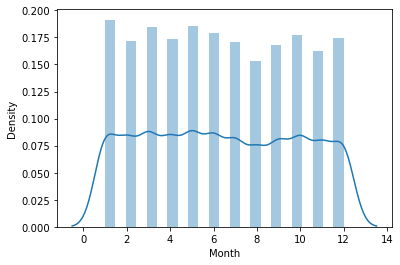

In [122]:
sns.distplot(df['Month'])

<AxesSubplot:xlabel='MonthClaimed', ylabel='Density'>

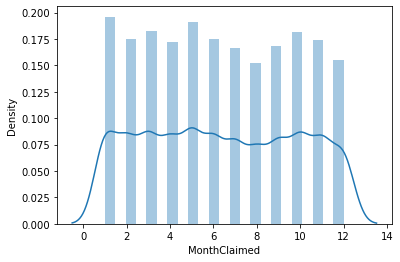

In [123]:
sns.distplot(df['MonthClaimed'])

<AxesSubplot:xlabel='Deductible', ylabel='Density'>

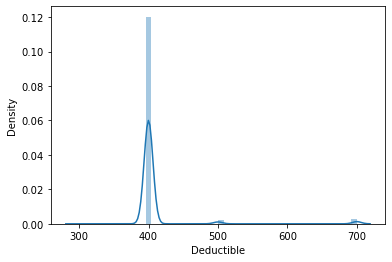

In [124]:
sns.distplot(df['Deductible'])

<AxesSubplot:xlabel='RepNumber', ylabel='Density'>

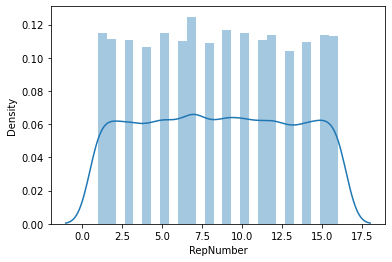

In [125]:
sns.distplot(df['RepNumber'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

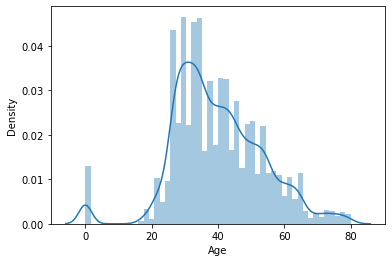

In [126]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='AgeOfVehicle', ylabel='Density'>

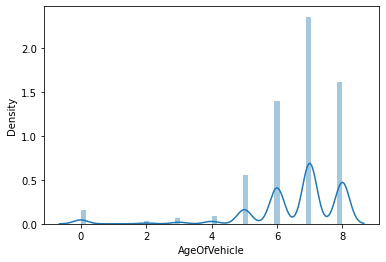

In [127]:
sns.distplot(df['AgeOfVehicle'])

<AxesSubplot:xlabel='VehiclePrice', ylabel='Density'>

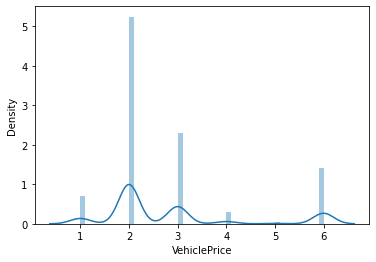

In [128]:
sns.distplot(df['VehiclePrice'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

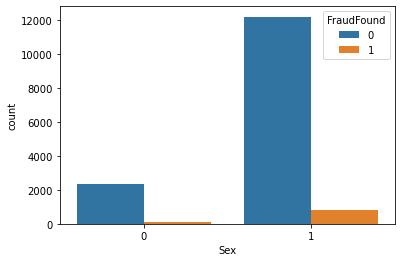

In [129]:
sns.countplot(df['Sex'],hue=df['FraudFound'])

<AxesSubplot:xlabel='Month', ylabel='count'>

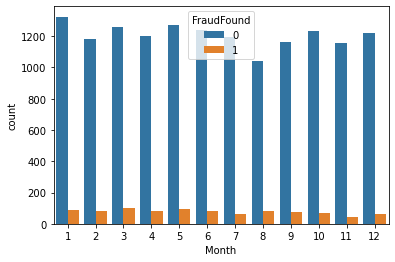

In [130]:
sns.countplot(df['Month'],hue=df['FraudFound'])

<AxesSubplot:xlabel='WeekOfMonth', ylabel='count'>

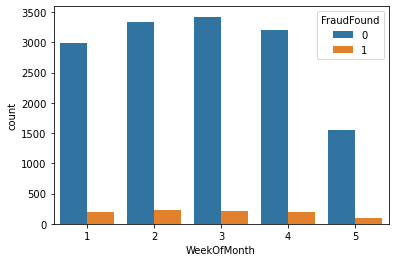

In [131]:
sns.countplot(df['WeekOfMonth'],hue=df['FraudFound'])

<AxesSubplot:xlabel='MonthClaimed', ylabel='count'>

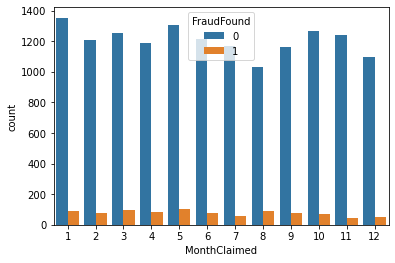

In [132]:
sns.countplot(df['MonthClaimed'],hue=df['FraudFound'])

<AxesSubplot:xlabel='Age', ylabel='count'>

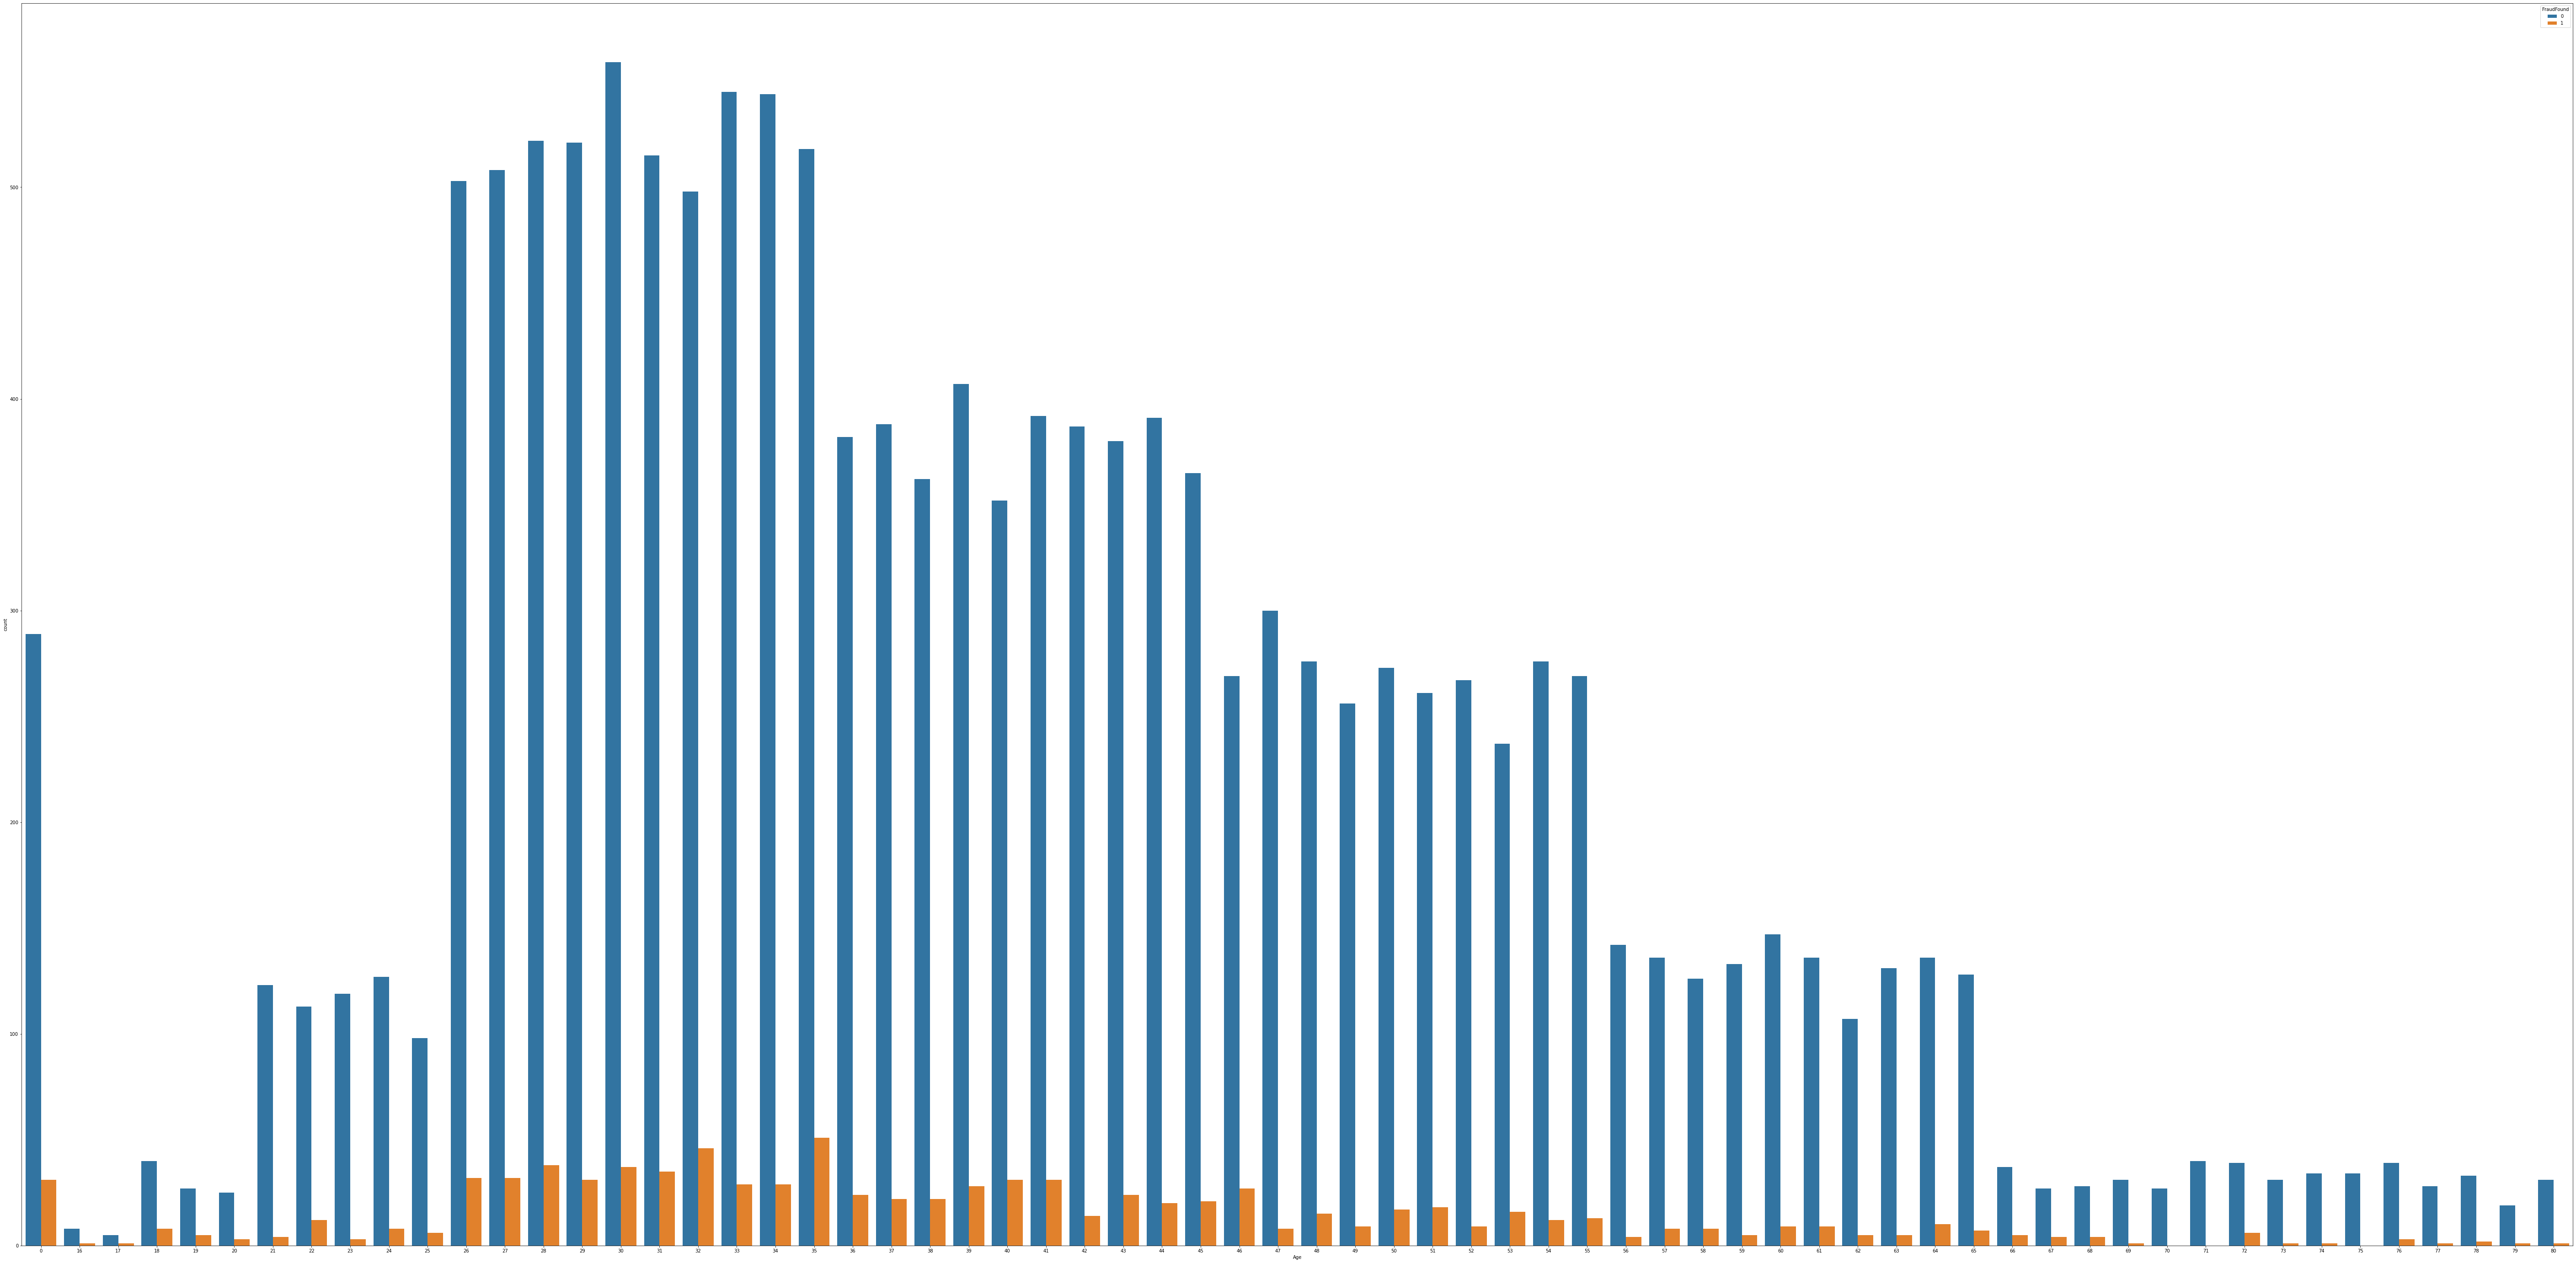

In [133]:
plt.figure(figsize=(100,50))
sns.countplot(df['Age'],hue=df['FraudFound'])

In [134]:
df.columns

Index(['Month', 'WeekOfMonth', 'Make', 'MonthClaimed', 'WeekOfMonthClaimed',
       'Sex', 'Age', 'Fault', 'VehiclePrice', 'RepNumber', 'Deductible',
       'DriverRating', 'PastNumberOfClaims', 'AgeOfVehicle',
       'PoliceReportFiled', 'NumberOfSuppliments', 'Urban', 'Married',
       'Single', 'Widow', 'Sedan - Collision', 'Sedan - Liability',
       'Sport - All Perils', 'Sport - Collision', 'Sport - Liability',
       'Utility - All Perils', 'Utility - Collision', 'Utility - Liability',
       'Sport', 'Utility', 'Collision', 'Liability', 'FraudFound'],
      dtype='object')

<AxesSubplot:xlabel='Fault', ylabel='count'>

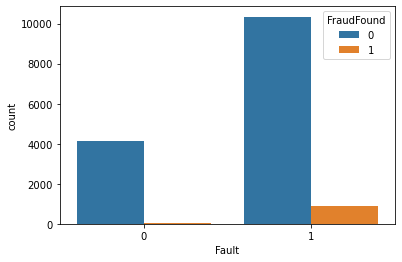

In [135]:
sns.countplot(df['Fault'],hue=df['FraudFound'])

<AxesSubplot:xlabel='VehiclePrice', ylabel='count'>

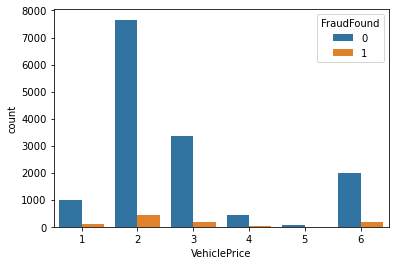

In [136]:
sns.countplot(df['VehiclePrice'],hue=df['FraudFound'])

<AxesSubplot:xlabel='RepNumber', ylabel='count'>

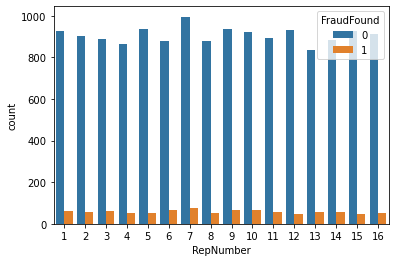

In [137]:
sns.countplot(df['RepNumber'],hue=df['FraudFound'])

<AxesSubplot:xlabel='Deductible', ylabel='count'>

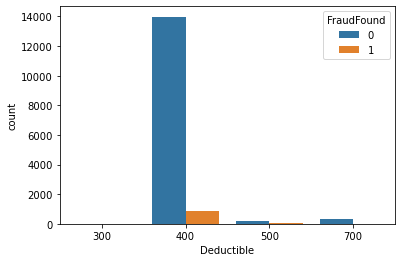

In [138]:
sns.countplot(df['Deductible'],hue=df['FraudFound'])

<AxesSubplot:xlabel='DriverRating', ylabel='count'>

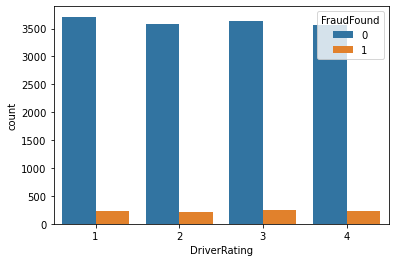

In [139]:
sns.countplot(df['DriverRating'],hue=df['FraudFound'])

<AxesSubplot:xlabel='PastNumberOfClaims', ylabel='count'>

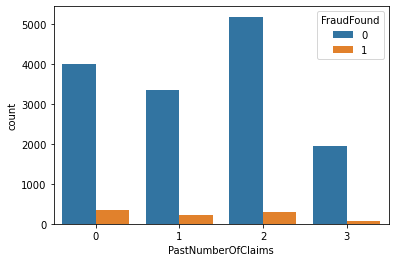

In [140]:
sns.countplot(df['PastNumberOfClaims'],hue=df['FraudFound'])

<AxesSubplot:xlabel='AgeOfVehicle', ylabel='count'>

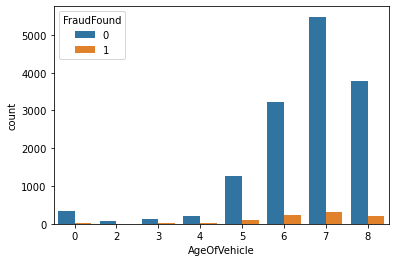

In [141]:
sns.countplot(df['AgeOfVehicle'],hue=df['FraudFound'])

<AxesSubplot:xlabel='PoliceReportFiled', ylabel='count'>

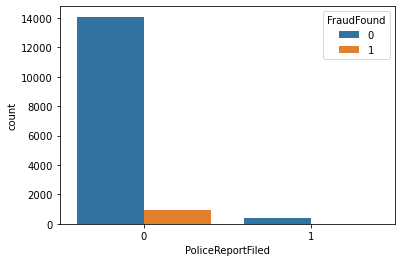

In [142]:
sns.countplot(df['PoliceReportFiled'],hue=df['FraudFound'])

<AxesSubplot:xlabel='NumberOfSuppliments', ylabel='count'>

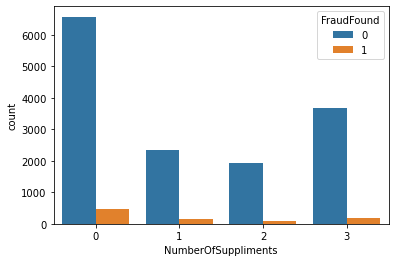

In [143]:
sns.countplot(df['NumberOfSuppliments'],hue=df['FraudFound'])

In [144]:
df.corr()

,Month,WeekOfMonth,Make,MonthClaimed,WeekOfMonthClaimed,Sex,Age,Fault,VehiclePrice,RepNumber,Deductible,DriverRating,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,NumberOfSuppliments,Urban,Married,Single,Widow,Sedan - Collision,Sedan - Liability,Sport - All Perils,Sport - Collision,Sport - Liability,Utility - All Perils,Utility - Collision,Utility - Liability,Sport,Utility,Collision,Liability,FraudFound
Month,1.000000,0.031442,0.007422,0.833616,0.053917,-0.007397,0.012778,0.003619,-0.034287,0.009520,-0.003074,0.008318,-0.024947,0.027530,0.047896,0.026952,0.002140,0.009206,-0.009206,0.000114,0.034259,-0.011952,0.010578,-0.006451,0.013005,0.009388,0.004343,0.006468,-0.012695,0.011504,0.032236,-0.011205,-0.027278
WeekOfMonth,0.031442,1.000000,0.005572,0.013870,0.275400,0.005314,-0.004810,-0.025456,-0.003549,0.005283,-0.003993,-0.016817,-0.003523,-0.009798,0.013026,0.000995,0.009116,-0.015966,0.017114,0.006773,-0.001306,-0.003734,0.000869,-0.000145,0.013832,0.003046,-0.033900,-0.008960,-0.003411,-0.008759,-0.004401,-0.004198,-0.011861
Make,0.007422,0.005572,1.000000,0.000125,0.003931,-0.041071,-0.049273,-0.023844,-0.296086,-0.005332,-0.000686,0.002897,-0.025278,-0.059825,-0.007198,-0.007495,0.013150,-0.043399,0.044119,-0.006208,0.030294,0.003605,0.007328,-0.001927,0.000991,-0.123058,-0.051070,-0.033112,0.003539,-0.137030,0.024689,0.001011,-0.019196
MonthClaimed,0.833616,0.013870,0.000125,1.000000,0.057452,-0.010677,0.029724,0.009293,-0.047654,0.011524,-0.002318,0.005323,-0.026336,0.051142,0.056717,0.036928,-0.003303,0.008127,-0.007998,-0.001355,0.042620,-0.004572,0.000584,-0.006268,-0.012447,0.007661,-0.000283,-0.016985,-0.006611,0.003092,0.040126,-0.006118,-0.028971
WeekOfMonthClaimed,0.053917,0.275400,0.003931,0.057452,1.000000,0.003739,0.001859,0.006337,-0.006074,0.008908,0.005457,-0.000048,0.014743,0.001012,0.023510,0.012062,0.006584,0.004627,-0.003982,0.011593,-0.003121,0.017637,-0.000365,-0.028958,-0.010835,0.003876,-0.006802,0.007579,0.008082,0.003492,-0.012527,0.018027,-0.005761
Sex,-0.007397,0.005314,-0.041071,-0.010677,0.003739,1.000000,0.073113,-0.000230,0.116585,-0.000833,0.014784,-0.002788,0.000123,0.102660,-0.007413,0.010329,-0.033804,0.131910,-0.114714,-0.069336,-0.000984,-0.062638,0.011585,0.018744,-0.018665,0.063571,0.019049,0.015933,-0.055085,0.068458,0.006469,-0.061632,0.029953
Age,0.012778,-0.004810,-0.049273,0.029724,0.001859,0.073113,1.000000,-0.009310,-0.088582,-0.007063,0.069420,0.001668,-0.027648,0.682472,-0.008346,0.090090,0.008223,0.445259,-0.452162,0.022529,-0.061969,-0.016198,-0.017679,-0.045496,-0.011255,0.055779,0.031015,0.004566,-0.031695,0.061867,-0.072228,-0.016014,-0.029741
Fault,0.003619,-0.025456,-0.023844,0.009293,0.006337,-0.000230,-0.009310,1.000000,0.034723,0.006240,0.002259,0.010277,0.122943,-0.027789,-0.027246,-0.008200,-0.008713,-0.009738,0.007849,0.004627,-0.034484,0.196367,0.003777,-0.082882,0.004919,0.058957,0.023660,0.014651,0.167438,0.065140,-0.057170,0.197380,0.131389
VehiclePrice,-0.034287,-0.003549,-0.296086,-0.047654,-0.006074,0.116585,-0.088582,0.034723,1.000000,0.013487,-0.005602,-0.002743,0.041829,-0.186582,0.009374,0.004437,-0.014719,-0.027735,0.029320,0.001073,-0.124787,0.016891,0.025583,0.337384,0.017881,0.303095,0.085792,0.077120,0.124157,0.325256,-0.012496,0.023252,0.031675
RepNumber,0.009520,0.005283,-0.005332,0.011524,0.008908,-0.000833,-0.007063,0.006240,0.013487,1.000000,0.000509,0.011031,0.001346,-0.005869,0.006107,0.003152,0.006766,0.006039,-0.005997,-0.000271,-0.011780,0.003072,0.016199,-0.004004,0.006157,0.004579,0.010079,0.000708,0.003158,0.007268,-0.011935,0.003231,-0.007551


<AxesSubplot:xlabel='FraudFound', ylabel='count'>

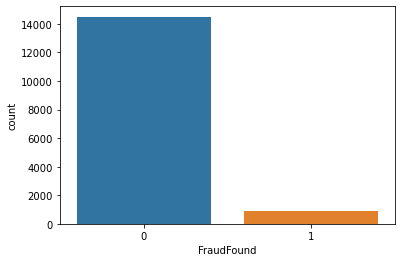

In [173]:
sns.countplot(df['FraudFound'])

In [178]:
X= df.drop('FraudFound',axis=1)
y=df['FraudFound']

## Imbalanced Data

## Resampling

## Random under-sampling and over-sampling with imbalanced-learn

In [179]:
from imblearn.under_sampling import RandomUnderSampler
rus= RandomUnderSampler()

In [180]:
X_rus, y_rus =rus.fit_resample(X,y)

In [184]:
print(y.shape,y_rus.shape)

(15420,) (1846,)


In [182]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()

In [183]:
X_ros,y_ros=ros.fit_resample(X,y)

In [185]:
print(y.shape,y_ros.shape)

(15420,) (28994,)


## Under-sampling: Tomek links

In [187]:
from imblearn.under_sampling import TomekLinks
tr = TomekLinks(sampling_strategy='majority')

In [188]:
X_tr,y_tr=tr.fit_resample(X,y)

In [189]:
print(y.shape,y_tr.shape)

(15420,) (15052,)


## Under-sampling: Cluster Centroids

In [192]:
from imblearn.under_sampling import ClusterCentroids
cc=ClusterCentroids(sampling_strategy={0: 600})
X_cc, y_cc = cc.fit_resample(X, y)

In [193]:
print(y.shape,y_cc.shape)

(15420,) (1523,)


## Over-sampling: SMOTE

In [194]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [196]:
print(y.shape,y_sm.shape)

(15420,) (28994,)


## Over-sampling followed by under-sampling

In [197]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(X, y)

In [198]:
print(y.shape,y_smt.shape)

(15420,) (28974,)


## Train Test Split

In [200]:
from sklearn.model_selection import train_test_split

In [201]:
 X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.33, random_state=42)

<AxesSubplot:xlabel='FraudFound', ylabel='count'>

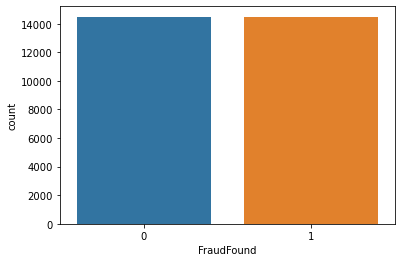

In [203]:
sns.countplot(y_smt)

## Normalization

In [205]:
from sklearn.preprocessing import MinMaxScaler

In [206]:
sc=MinMaxScaler(feature_range=(0, 1))

In [207]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Classification Models

### Random Forest

In [208]:
from sklearn.ensemble import RandomForestClassifier

In [209]:
M1=RandomForestClassifier()

In [210]:
M1.fit(X_train,y_train)

RandomForestClassifier()

In [211]:
P1= M1.predict(X_test)

In [212]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score

In [213]:
print(classification_report(y_test,P1))
print('\n')
print(confusion_matrix(y_test, P1))
print('\n')
accuracy=accuracy_score(y_test, P1)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P1))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4811
           1       0.94      0.96      0.95      4751

    accuracy                           0.95      9562
   macro avg       0.95      0.95      0.95      9562
weighted avg       0.95      0.95      0.95      9562



[[4520  291]
 [ 180 4571]]


Accuracy: 95.07%
ROC AUC Score 0.9508134269755854


In [214]:
a=df.columns
df.shape

(15420, 33)

In [215]:
feature_imp = pd.DataFrame(M1.feature_importances_,index=a[0:32] )

In [216]:
feature_imp.sort_values(ascending=False,by=0).head()

,0
Make,0.107457
Fault,0.092215
Sedan - Liability,0.065896
Sport,0.063470
Age,0.062773


## Predictions and Evaluations From Top feature

In [217]:
from sklearn.feature_selection import RFE

In [218]:
M2=RFE(M1,n_features_to_select=7)

In [219]:
M2.fit(X_train,y_train)
P2=M2.predict(X_test)
print(classification_report(y_test,P2))
print('\n')
print(confusion_matrix(y_test, P2))
print('\n')
accuracy=accuracy_score(y_test, P2)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P2))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      4811
           1       0.91      0.94      0.93      4751

    accuracy                           0.93      9562
   macro avg       0.93      0.93      0.93      9562
weighted avg       0.93      0.93      0.93      9562



[[4375  436]
 [ 266 4485]]


Accuracy: 92.66%
ROC AUC Score 0.9266930687195524


# Decision Tree

In [220]:
from sklearn.tree import DecisionTreeClassifier

In [221]:
M3= DecisionTreeClassifier()

In [222]:
M3.fit(X_train,y_train)
P3=M3.predict(X_test)
print(classification_report(y_test,P3))
print('\n')
print(confusion_matrix(y_test, P3))
print('\n')
accuracy=accuracy_score(y_test, P3)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P3))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      4811
           1       0.91      0.95      0.93      4751

    accuracy                           0.93      9562
   macro avg       0.93      0.93      0.93      9562
weighted avg       0.93      0.93      0.93      9562



[[4352  459]
 [ 241 4510]]


Accuracy: 92.68%
ROC AUC Score 0.9269337383314503


# SVM

In [223]:
from sklearn.svm import SVC

In [224]:
M4=SVC()

In [225]:
M4.fit(X_train,y_train)
P4=M4.predict(X_test)
print(classification_report(y_test,P4))
print('\n')
print(confusion_matrix(y_test, P4))
print('\n')
accuracy=accuracy_score(y_test, P4)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P4))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      4811
           1       0.84      0.93      0.88      4751

    accuracy                           0.88      9562
   macro avg       0.88      0.88      0.88      9562
weighted avg       0.88      0.88      0.88      9562



[[3996  815]
 [ 355 4396]]


Accuracy: 87.76%
ROC AUC Score 0.8779377191144565


## Naive Bayes classifier

In [230]:
from sklearn.naive_bayes import GaussianNB

In [231]:
M5=GaussianNB()

In [232]:
M5.fit(X_train,y_train)
P5=M5.predict(X_test)
print(classification_report(y_test,P5))
print('\n')
print(confusion_matrix(y_test, P5))
print('\n')
accuracy=accuracy_score(y_test, P5)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P5))

              precision    recall  f1-score   support

           0       0.97      0.39      0.56      4811
           1       0.62      0.99      0.76      4751

    accuracy                           0.69      9562
   macro avg       0.79      0.69      0.66      9562
weighted avg       0.79      0.69      0.66      9562



[[1890 2921]
 [  60 4691]]


Accuracy: 68.82%
ROC AUC Score 0.6901103995828686


## KNN

In [233]:
from sklearn.neighbors import KNeighborsClassifier

In [236]:
error_Mat=[]
for i in range (1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict_i=knn.predict(X_test)
    error_Mat.append(np.mean(predict_i != y_test))

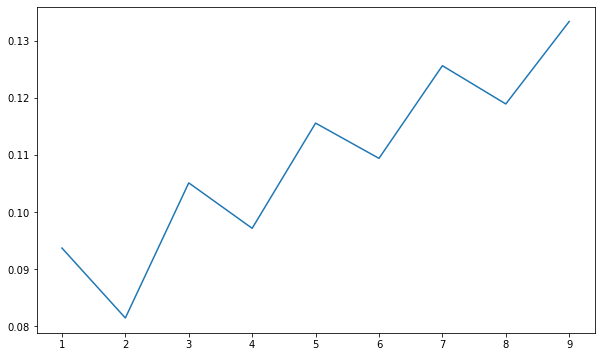

In [238]:
plt.figure(figsize=(10,6))
plt.plot(range (1,10),error_Mat)

In [240]:
M6=KNeighborsClassifier(n_neighbors=2)

In [241]:
M6.fit(X_train,y_train)
P6=M6.predict(X_test)
print(classification_report(y_test,P6))
print('\n')
print(confusion_matrix(y_test, P6))
print('\n')
accuracy=accuracy_score(y_test, P6)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P6))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      4811
           1       0.90      0.95      0.92      4751

    accuracy                           0.92      9562
   macro avg       0.92      0.92      0.92      9562
weighted avg       0.92      0.92      0.92      9562



[[4284  527]
 [ 252 4499]]


Accuracy: 91.85%
ROC AUC Score 0.9187089495014253


## Logistic Regression

In [242]:
from sklearn.linear_model import LogisticRegression

In [245]:
M7=LogisticRegression()
M7.fit(X_train,y_train)
P7=M7.predict(X_test)
print(classification_report(y_test,P7))
print('\n')
print(confusion_matrix(y_test, P7))
print('\n')
accuracy=accuracy_score(y_test, P7)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P7))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      4811
           1       0.82      0.86      0.84      4751

    accuracy                           0.84      9562
   macro avg       0.84      0.84      0.84      9562
weighted avg       0.84      0.84      0.84      9562



[[3917  894]
 [ 677 4074]]


Accuracy: 83.57%
ROC AUC Score 0.8358397652261592


## GB Boosting

In [244]:
from sklearn.ensemble import GradientBoostingClassifier

In [246]:
M8=GradientBoostingClassifier()
M8.fit(X_train,y_train)
P8=M8.predict(X_test)
print(classification_report(y_test,P8))
print('\n')
print(confusion_matrix(y_test, P8))
print('\n')
accuracy=accuracy_score(y_test, P8)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P8))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      4811
           1       0.91      0.92      0.92      4751

    accuracy                           0.92      9562
   macro avg       0.92      0.92      0.92      9562
weighted avg       0.92      0.92      0.92      9562



[[4374  437]
 [ 372 4379]]


Accuracy: 91.54%
ROC AUC Score 0.9154335940215585


# Histogram Boosting Classifier

In [247]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [248]:
M9=HistGradientBoostingClassifier()
M9.fit(X_train,y_train)
P9=M9.predict(X_test)
print(classification_report(y_test,P9))
print('\n')
print(confusion_matrix(y_test, P9))
print('\n')
accuracy=accuracy_score(y_test, P9)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P9))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4811
           1       0.95      0.94      0.95      4751

    accuracy                           0.95      9562
   macro avg       0.95      0.95      0.95      9562
weighted avg       0.95      0.95      0.95      9562



[[4572  239]
 [ 277 4474]]


Accuracy: 94.60%
ROC AUC Score 0.9460093316459189


## XGB Boosting

In [250]:
from xgboost import XGBClassifier

In [251]:
M10=XGBClassifier()
M10.fit(X_train,y_train)
P10=M10.predict(X_test)
print(classification_report(y_test,P10))
print('\n')
print(confusion_matrix(y_test, P10))
print('\n')
accuracy=accuracy_score(y_test, P10)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P10))

[17:44:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      4811
           1       0.96      0.95      0.96      4751

    accuracy                           0.96      9562
   macro avg       0.96      0.96      0.96      9562
weighted avg       0.96      0.96      0.96      9562



[[4640  171]
 [ 223 4528]]


Accuracy: 95.88%
ROC AUC Score 0.9587594835574005


## Light GBM

In [252]:
from lightgbm import LGBMClassifier

In [253]:
M11=LGBMClassifier()
M11.fit(X_train,y_train)
P11=M11.predict(X_test)
print(classification_report(y_test,P11))
print('\n')
print(confusion_matrix(y_test, P11))
print('\n')
accuracy=accuracy_score(y_test, P11)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P11))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      4811
           1       0.96      0.94      0.95      4751

    accuracy                           0.95      9562
   macro avg       0.95      0.95      0.95      9562
weighted avg       0.95      0.95      0.95      9562



[[4605  206]
 [ 285 4466]]


Accuracy: 94.87%
ROC AUC Score 0.948597044038164


## CAT Boosting

In [254]:
from catboost import CatBoostClassifier

In [255]:
M12=CatBoostClassifier()
M12.fit(X_train,y_train)
P12=M12.predict(X_test)

Learning rate set to 0.036554
0:	learn: 0.6598669	total: 349ms	remaining: 5m 49s
1:	learn: 0.6298598	total: 372ms	remaining: 3m 5s
2:	learn: 0.6036136	total: 388ms	remaining: 2m 8s
3:	learn: 0.5733580	total: 400ms	remaining: 1m 39s
4:	learn: 0.5535007	total: 414ms	remaining: 1m 22s
5:	learn: 0.5287476	total: 427ms	remaining: 1m 10s
6:	learn: 0.5124525	total: 439ms	remaining: 1m 2s
7:	learn: 0.4967766	total: 451ms	remaining: 56s
8:	learn: 0.4834025	total: 464ms	remaining: 51.1s
9:	learn: 0.4698079	total: 476ms	remaining: 47.2s
10:	learn: 0.4603512	total: 489ms	remaining: 44s
11:	learn: 0.4492483	total: 502ms	remaining: 41.3s
12:	learn: 0.4404213	total: 514ms	remaining: 39s
13:	learn: 0.4297875	total: 527ms	remaining: 37.1s
14:	learn: 0.4225612	total: 540ms	remaining: 35.5s
15:	learn: 0.4146495	total: 557ms	remaining: 34.2s
16:	learn: 0.4098689	total: 573ms	remaining: 33.1s
17:	learn: 0.4025150	total: 586ms	remaining: 32s
18:	learn: 0.3972327	total: 598ms	remaining: 30.9s
19:	learn: 0.39

In [256]:
print(classification_report(y_test,P12))
print('\n')
print(confusion_matrix(y_test, P12))
print('\n')
accuracy=accuracy_score(y_test, P12)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,P12))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      4811
           1       0.96      0.95      0.95      4751

    accuracy                           0.96      9562
   macro avg       0.96      0.96      0.96      9562
weighted avg       0.96      0.96      0.96      9562



[[4639  172]
 [ 256 4495]]


Accuracy: 95.52%
ROC AUC Score 0.9551826019976934


In [257]:
Name=['Random Forest Classifier','Decision Tree','SVM', 'Naive Bayes classifier', 'KNN', 'Logistic Regression', 
      'GBBoosting','Histogram Boosting Classifier','XGB Boosting','Light GBM','CAT Boosting']
clfs= [RandomForestClassifier(),DecisionTreeClassifier(),SVC(),GaussianNB(),KNeighborsClassifier(n_neighbors=2),
       LogisticRegression(),GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1),
       HistGradientBoostingClassifier(),XGBClassifier(),LGBMClassifier(),CatBoostClassifier()]

In [258]:
results=[]

for i in clfs:
    i.fit(X_train,y_train)
    score=roc_auc_score(y_test,i.predict(X_test))
    results.append(score)
    
Score=pd.DataFrame(data=results,index=Name)
Score.columns=['Accuracy']
Score.sort_values(by='Accuracy',ascending=False)

[18:00:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.036554
0:	learn: 0.6598669	total: 26.4ms	remaining: 26.4s
1:	learn: 0.6298598	total: 40.8ms	remaining: 20.3s
2:	learn: 0.6036136	total: 55.1ms	remaining: 18.3s
3:	learn: 0.5733580	total: 68.6ms	remaining: 17.1s
4:	learn: 0.5535007	total: 81.5ms	remaining: 16.2s
5:	learn: 0.5287476	total: 94.9ms	remaining: 15.7s
6:	learn: 0.5124525	total: 108ms	remaining: 15.3s
7:	learn: 0.4967766	total: 121ms	remaining: 15s
8:	learn: 0.4834025	total: 135ms	remaining: 14.8s
9:	learn: 0.4698079	total: 148ms	remaining: 14.7s
10:	learn: 0.4603512	total: 162ms	remaining: 14.6s
11:	learn: 0.4492483	total: 177ms	remaining: 14.6s
12:	learn: 0.4404213	total: 190ms	remaining: 14.4s
13:

,Accuracy
XGB Boosting,0.958759
CAT Boosting,0.955183
Random Forest Classifier,0.953951
Light GBM,0.948597
Histogram Boosting Classifier,0.945695
Decision Tree,0.925584
KNN,0.918709
GBBoosting,0.912140
SVM,0.877938
Logistic Regression,0.835840


In [259]:
Score.sort_values(by='Accuracy',ascending=False)

,Accuracy
XGB Boosting,0.958759
CAT Boosting,0.955183
Random Forest Classifier,0.953951
Light GBM,0.948597
Histogram Boosting Classifier,0.945695
Decision Tree,0.925584
KNN,0.918709
GBBoosting,0.912140
SVM,0.877938
Logistic Regression,0.835840


## Tuning

In [262]:
from sklearn.model_selection import KFold,cross_val_score

In [261]:
kfold=KFold(n_splits=5,shuffle=False, random_state=None)

In [263]:
results_mean=[]

for i in clfs:
    csv=cross_val_score(i,X_train,y_train,cv=kfold)
    mean_score=csv.mean()
    results_mean.append(mean_score)

score= pd.DataFrame(results_mean,index=Name)
score.columns=['Accuracy']

[18:07:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:07:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:07:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:07:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [264]:
score.sort_values(by='Accuracy',ascending=False)

,Accuracy
XGB Boosting,0.953225
CAT Boosting,0.952092
Light GBM,0.946580
Random Forest Classifier,0.944931
Histogram Boosting Classifier,0.939934
Decision Tree,0.925665
GBBoosting,0.913146
KNN,0.912889
SVM,0.873377
Logistic Regression,0.835720


In [266]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(M10, open(filename, 'wb'))

In [267]:
#loaded_model = pickle.load(open(filename, 'rb'))